In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
df=pd.read_csv("spambase_csv_Kaggle.csv")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.shape

(4601, 58)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
non_spam_count=len(df[df['class']==0])
spam_count=len(df[df['class']==1])
print(f"Non Spam: {non_spam_count/len(df)} %")
print(f"Spam: {spam_count/len(df)} %")

Non Spam: 0.6059552271245382 %
Spam: 0.39404477287546186 %


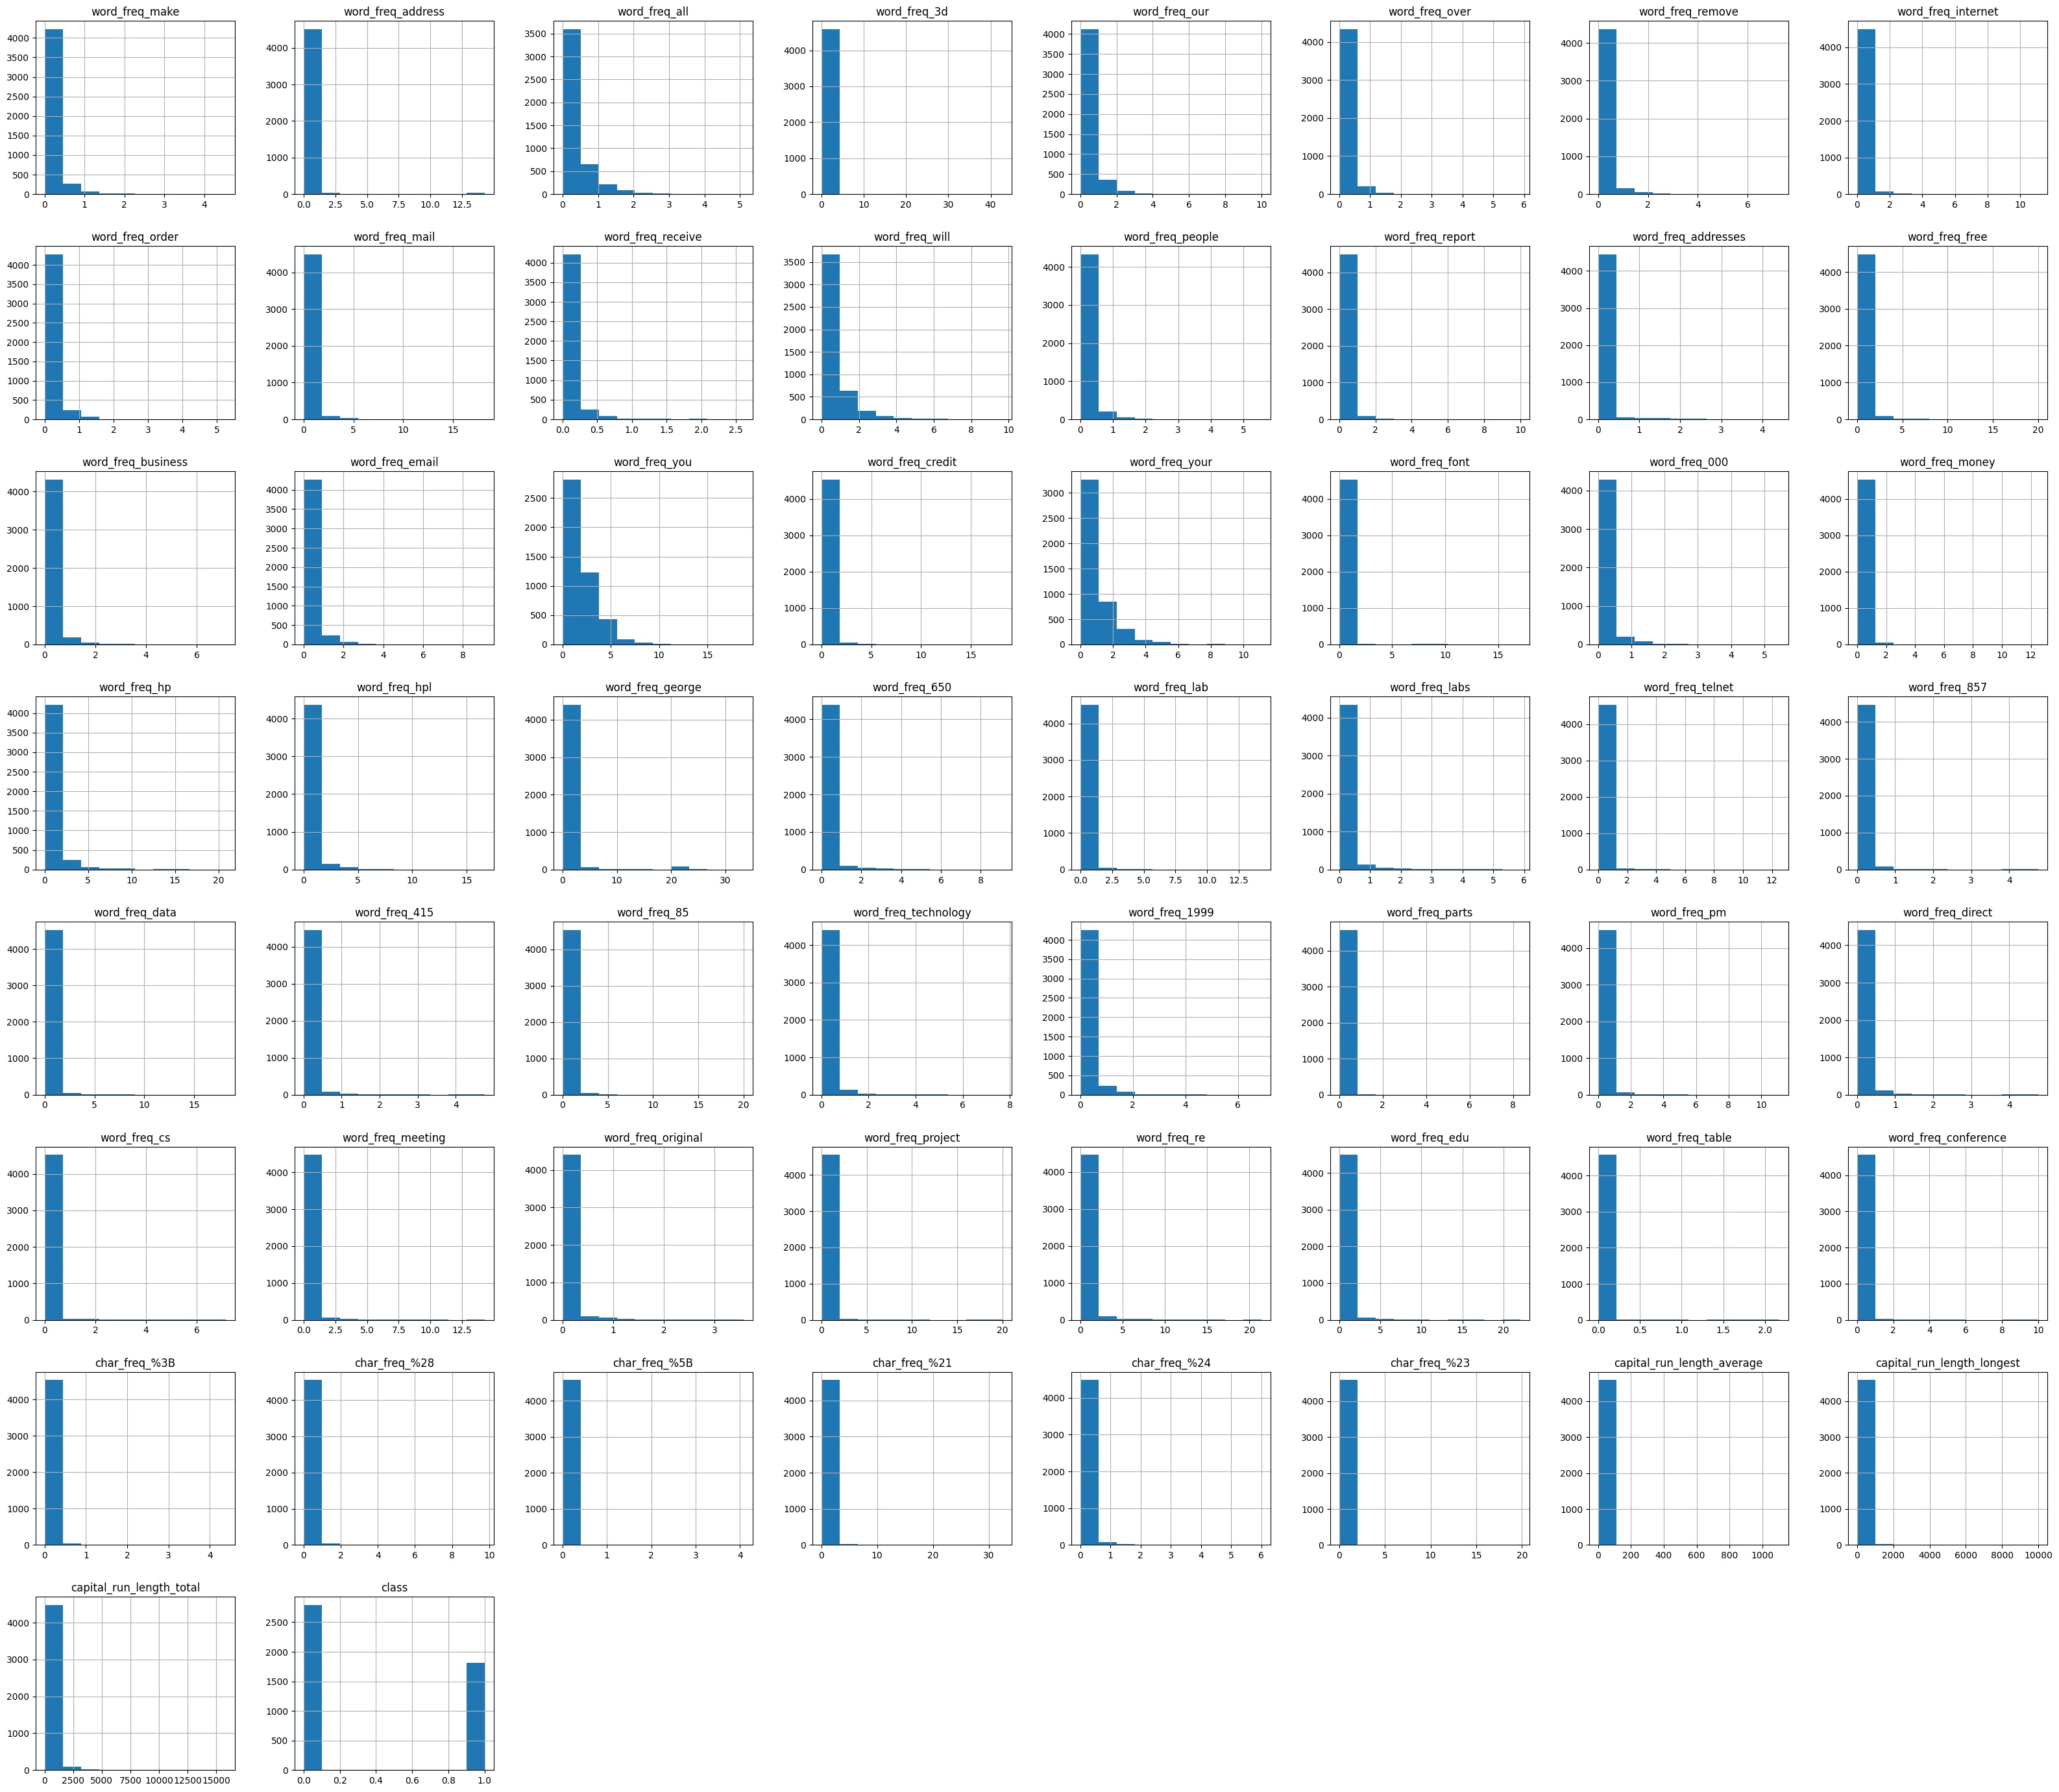

In [8]:
df.hist(bins = 10, figsize = (40,35))
plt.show()

<Axes: xlabel='class', ylabel='Count'>

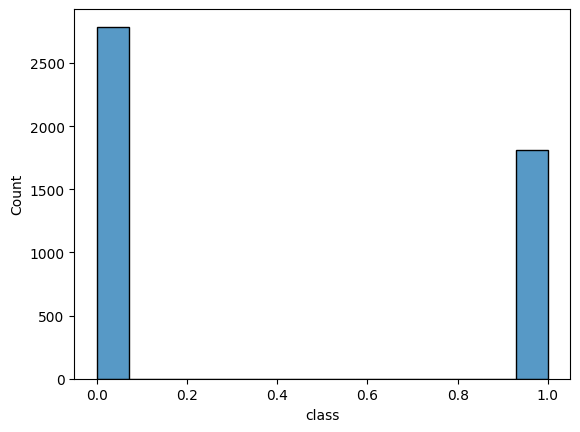

In [9]:
sns.histplot(df['class'])

In [10]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [11]:
from sklearn.model_selection import train_test_split
Y=df['class']
X=df.drop('class', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, Y, random_state=42, test_size=0.2)
print(f"Test Size: {len(X_test)}")

Test Size: 921


In [12]:
y_test.shape

(921,)

In [14]:
gaussnb=GaussianNB()
gaussnb.fit(X=X_train, y=y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

#write function to store all error metrics in a df

y_pred=gaussnb.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.8208469055374593


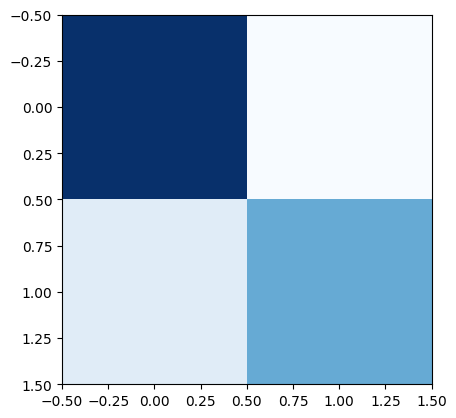

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")

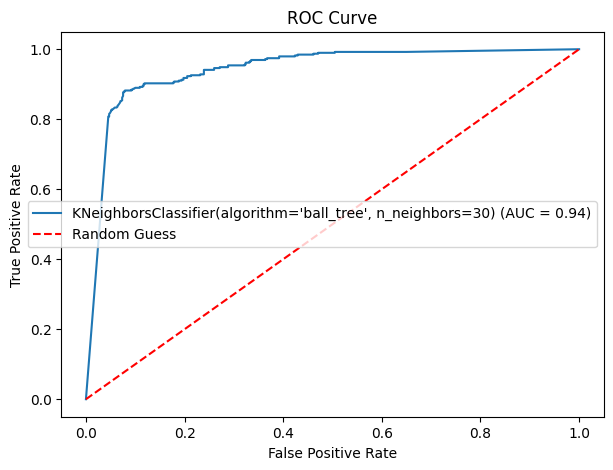

In [44]:
from sklearn.metrics import roc_curve, auc

y_prob=gaussnb.predict_proba(X_test)[:,1]
#i dont know man figure it! 
plt.figure(figsize=(7, 5))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier

start=time.perf_counter()

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_y_pred=knn.predict(X_test)

end=time.perf_counter()

print("KNN Accuracy: ", accuracy_score(y_test, knn_y_pred))
print("KNN Precision: ", precision_score(y_test, knn_y_pred))
print("Time taken; ", end-start, " s")

KNN Accuracy:  0.7882736156351792
KNN Precision:  0.7809798270893372
Time taken;  0.05731921699953091  s


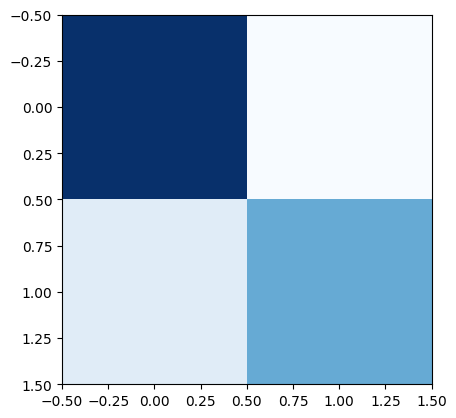

In [29]:
cm=confusion_matrix(y_test, knn_y_pred)
plt.imshow(cm, cmap="Blues")
#plt.figure(figsize=(5, 5)) 
plt.show()

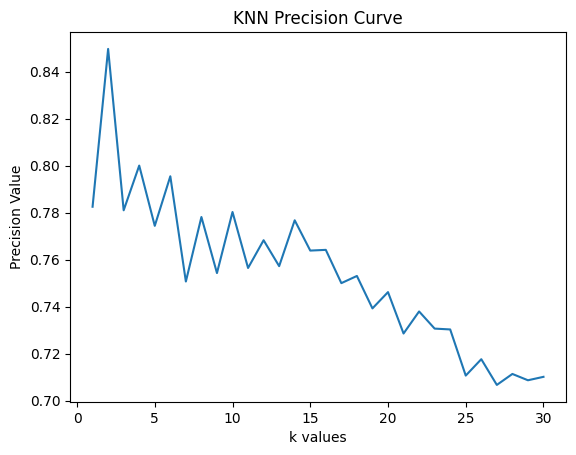

In [30]:
prec_scores=[]
for i in range(1,31):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    prec=precision_score(y_test, y_pred)
    prec_scores.append(prec)

sns.lineplot(x=range(1,31), y=prec_scores)
plt.title("KNN Precision Curve")
plt.xlabel("k values")
plt.ylabel("Precision Value")
plt.show()

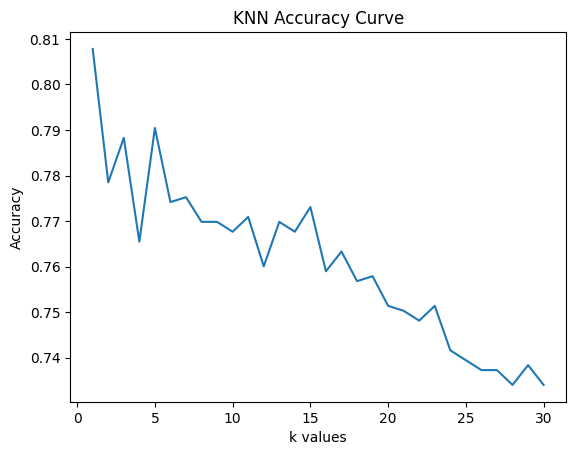

In [32]:
acc_scores=[]
for i in range(1,31):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    acc_scores.append(acc)

sns.lineplot(x=range(1,31), y=acc_scores)
plt.title("KNN Accuracy Curve")
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
param_grid={
    "k":range(1,31),
    "distance":['euclidean', 'manhattan']
}

In [20]:
start=time.perf_counter()

ball_tree=KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
ball_tree.fit(X_train, y_train)
bt_y_pred=ball_tree.predict(X_test)

end=time.perf_counter()

print("KNN Accuracy: ", accuracy_score(y_test, bt_y_pred))
print("Time taken; ", end-start, " s")

KNN Accuracy:  0.7893593919652552
Time taken;  0.052483506000044144  s


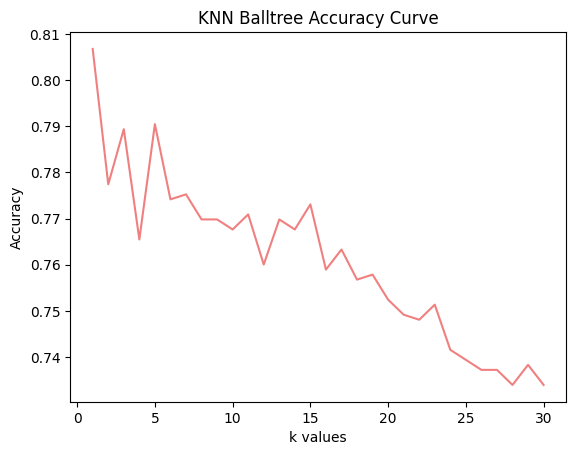

In [33]:
acc_scores=[]
for i in range(1,31):
    model=KNeighborsClassifier(n_neighbors=i, algorithm='ball_tree')
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    acc_scores.append(acc)

sns.lineplot(x=range(1,31), y=acc_scores, color="lightcoral")
plt.title("KNN Balltree Accuracy Curve")
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()